In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation 

In [2]:
df_sp = pd.read_csv('data/evaluation_sample.csv', sep='|')

In [3]:
df_sp

,message,label
0,Feméride' (DCV): hoy se cumplen 60 años del es...,non-racist
1,Pegan una paliza a dos policías en Zaragoza Pe...,racist
2,@A_ausdenRuthen @SimonLevyMx Pinches musulmane...,non-racist
3,@Puri95702837 @yeilouondeflo @PLAyer__slaYER @...,non-racist
4,@HamzaMaca a quien juzgo? a ti? has empezado a...,non-racist
5,""" la Policía Nacional busca a dos jóvenes magr...",racist
6,me gustaría que dejasen de meterme en chats po...,non-racist
7,"@LisQue2 Claro, porque quieren cobrar más., no...",non-racist
8,🚧 Los vecinos de Tunte (Gran Canaria) levantan...,racist
9,"Sí, sí, apagaréis el alumbrado publico nocturn...",racist


In [4]:
df_sp.label.unique()

array(['non-racist', 'racist'], dtype=object)

In [5]:
labels = pd.read_csv('data/labels_racism.csv', sep='|')

In [6]:
labels

,message,labeller_id,label
0,🔴 Un grupo de inmigrantes de botellón y sin ma...,1,non-racist
1,Recopilamos las principales noticias sobre bro...,1,non-racist
2,Esto debería leerlo todo Ecuador. Es el mayor ...,1,non-racist
3,Más de 300 inmigrantes intentan saltar la vall...,1,non-racist
4,Aena invierte más de 31 millones de euros en e...,1,non-racist
...,...,...,...
9286,"En televisión, desde que gobierna la izquierda...",22,racist
9287,VOX apoya a los vecinos de #ElMasnou atacados ...,22,racist
9288,@DelCastanedo Hay muchos chiringuitos q manten...,22,racist
9289,@anagogica TVE = Aló presidente. Resto de medi...,22,racist


In [7]:
labels.label.unique()

array(['non-racist', 'racist', 'unknown'], dtype=object)

In [8]:
df_pb = pd.read_csv('data/evaluation_public.csv', sep='|')

In [65]:
df_pb

,message,label
0,"@Karmaleonic Estas mal, a los tres magrebíes q...",NaN
1,@Biba4343 @populares @pablocasado_ El PP tiene...,NaN
2,Un diputado de Navarra Suma saca los colores a...,NaN
3,Una recomendación del Parlamento Europeo que d...,NaN
4,Cartagena. Vecinos denuncian continuos robos. ...,NaN
...,...,...
126,@islamenmurcia @VivirSinRacismo @CONGDRMurcia ...,NaN
127,"@occidcomitatus Me puse a leer sobre él, y si ...",NaN
128,"@OtraPendeja Salen esos panchitos, pizzas, pic...",NaN
129,@yag6mi @denjikiut @drak69n nos cambio por alg...,NaN


In [9]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   message  131 non-null    object 
 1   label    0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [14]:
n_features = 1000
n_components = 10
n_top_words = 20
n_obs = len(labels)

In [11]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()




In [12]:
data_samples = labels.message

In [16]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_obs=%d and n_features=%d..." % (n_obs, n_features)
)
t0 = time()
nmf = NMF(n_components=n_components, random_state=1, alpha_W=0.1, l1_ratio=0.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

Extracting tf-idf features for NMF...
done in 0.269s.
Extracting tf features for LDA...
Fitting the NMF model (Frobenius norm) with tf-idf features, n_obs=9291 and n_features=1000...
done in 0.069s.


/Users/mhc/anaconda3/envs/miri/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


done in 0.298s.



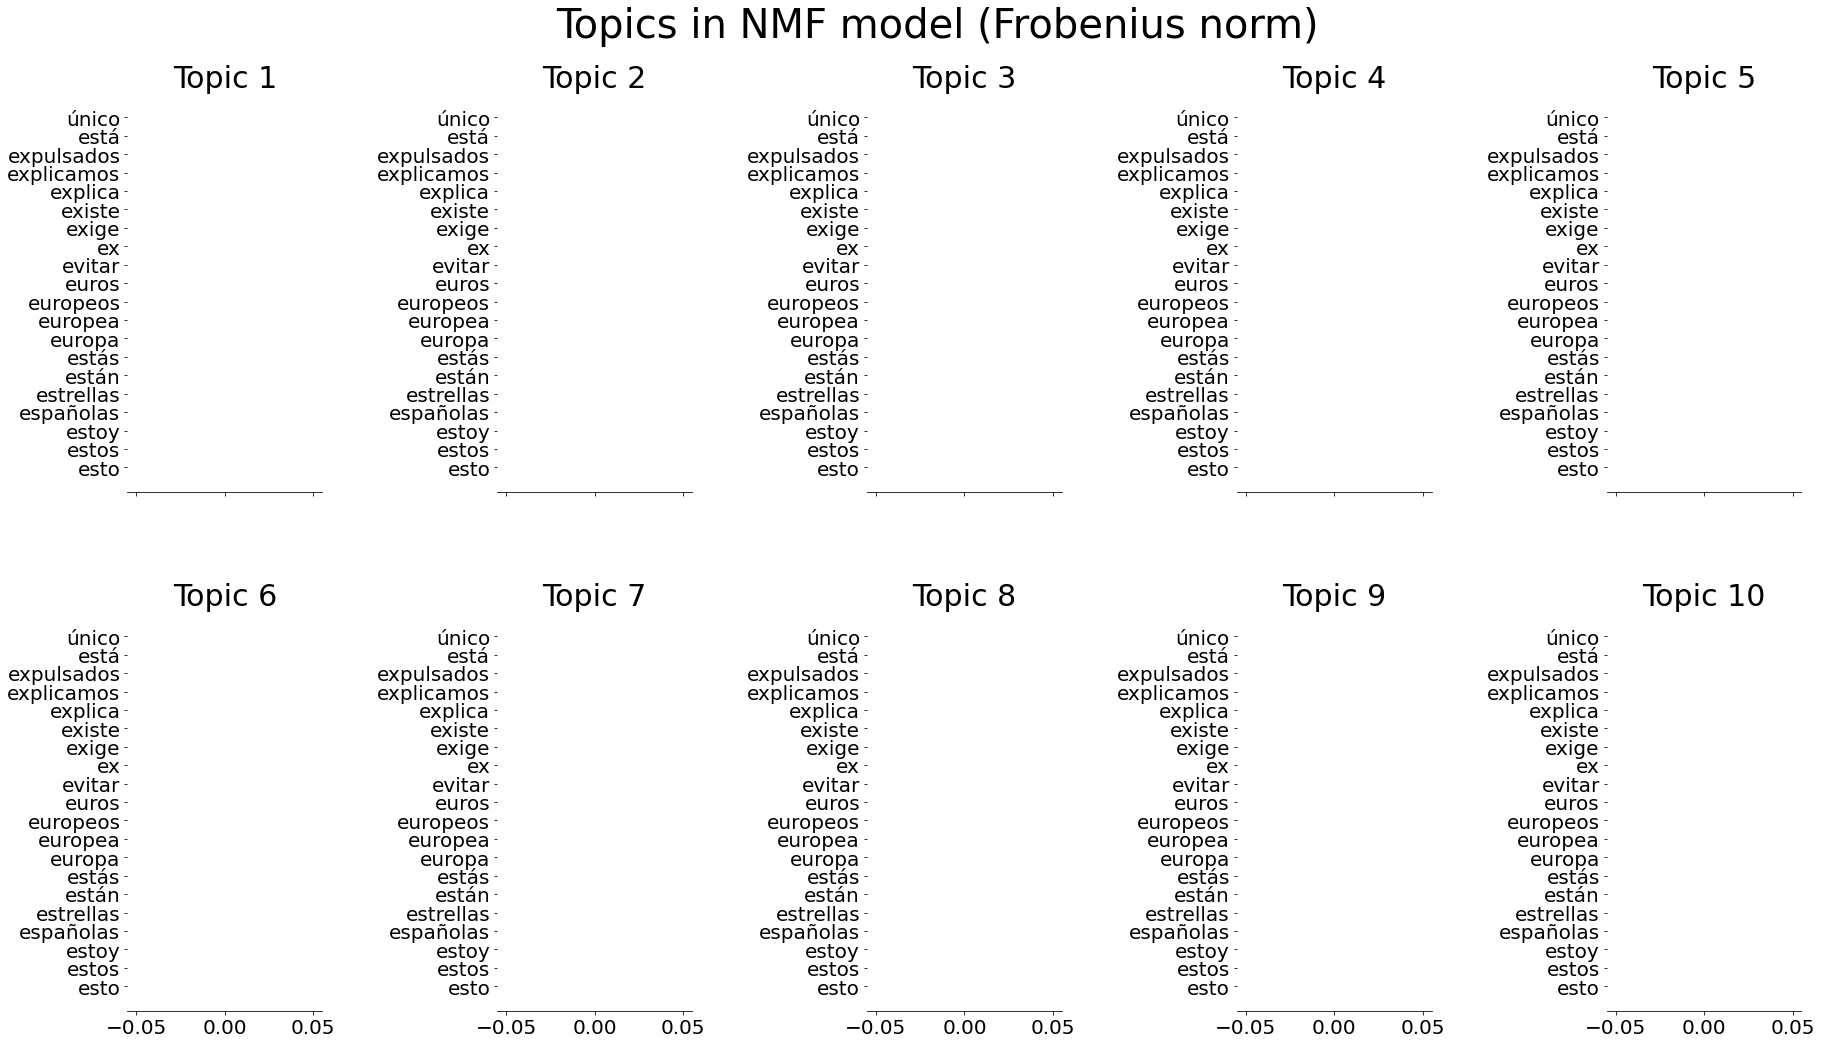

In [17]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)


In [19]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_obs=%d and n_features=%d..."
    % (n_obs, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.1,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))




 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=9291 and n_features=1000...


/Users/mhc/anaconda3/envs/miri/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/mhc/anaconda3/envs/miri/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


done in 2.764s.


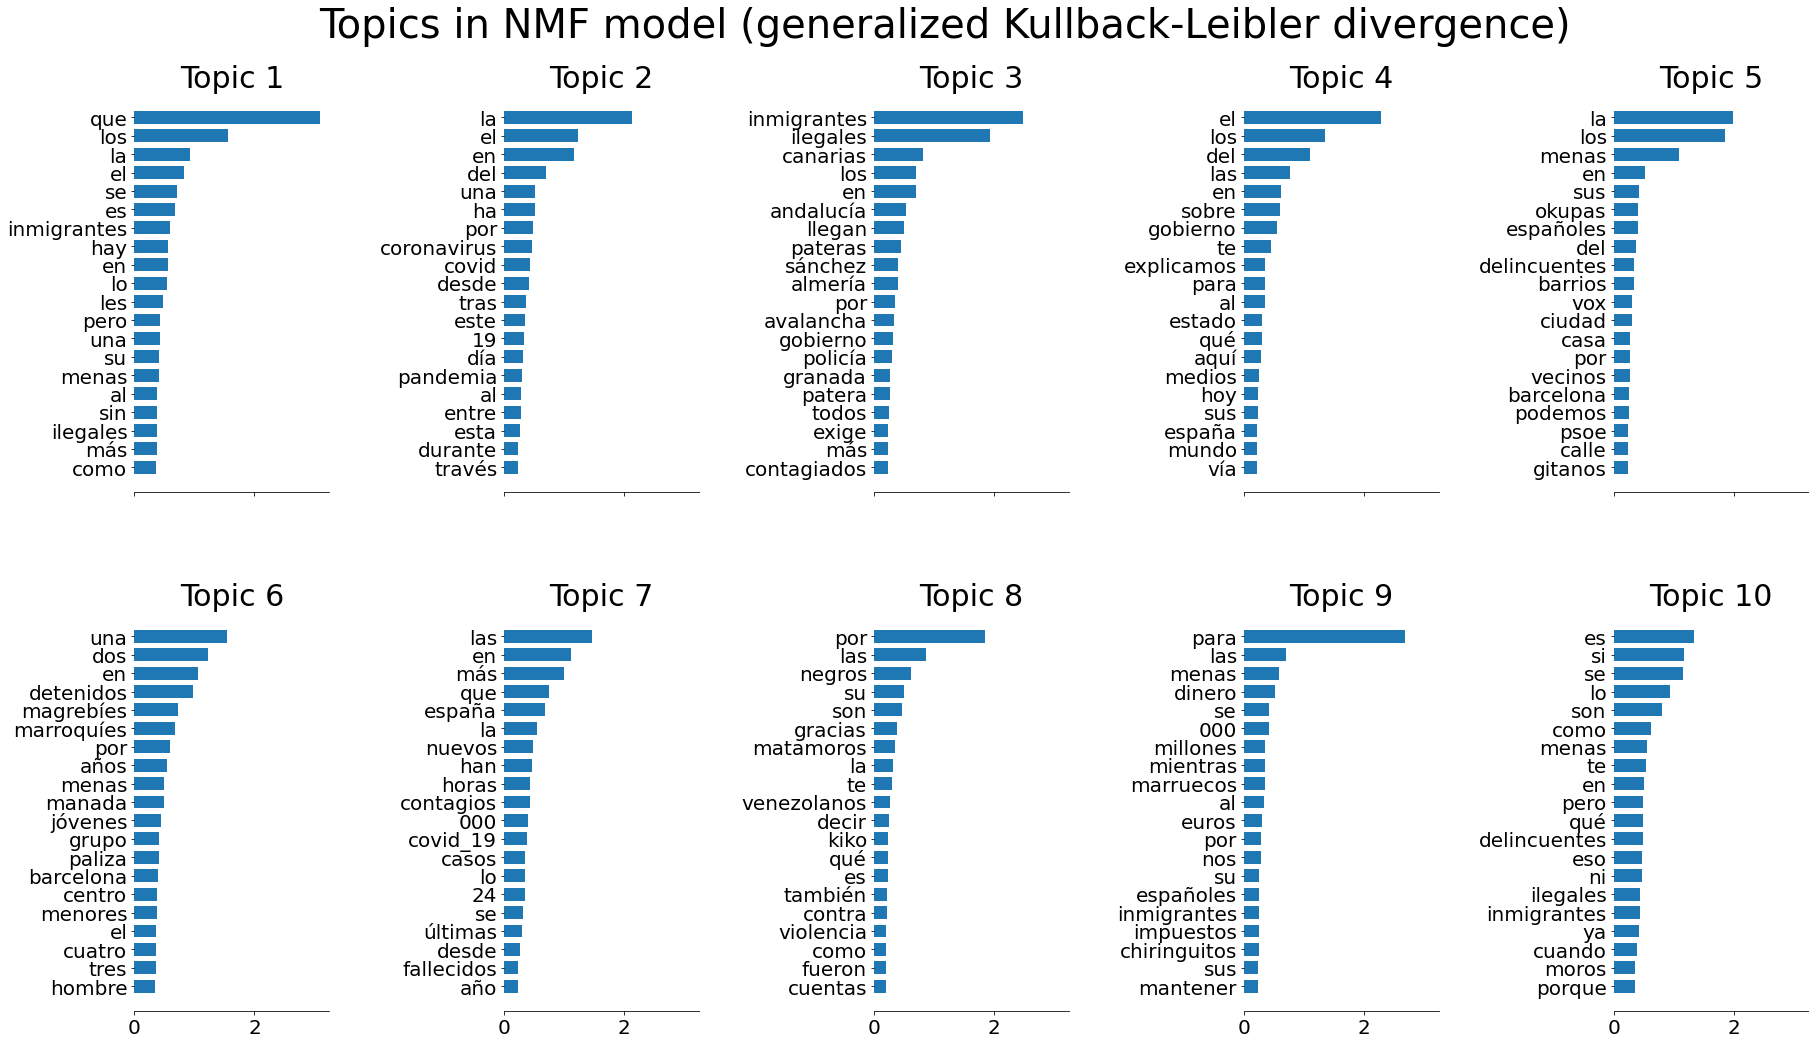

In [20]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)


In [22]:
print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_obs=%d and n_features=%d..."
    % (n_obs, n_features),
)



 Fitting LDA models with tf features, n_samples=9291 and n_features=1000...


done in 8.127s.


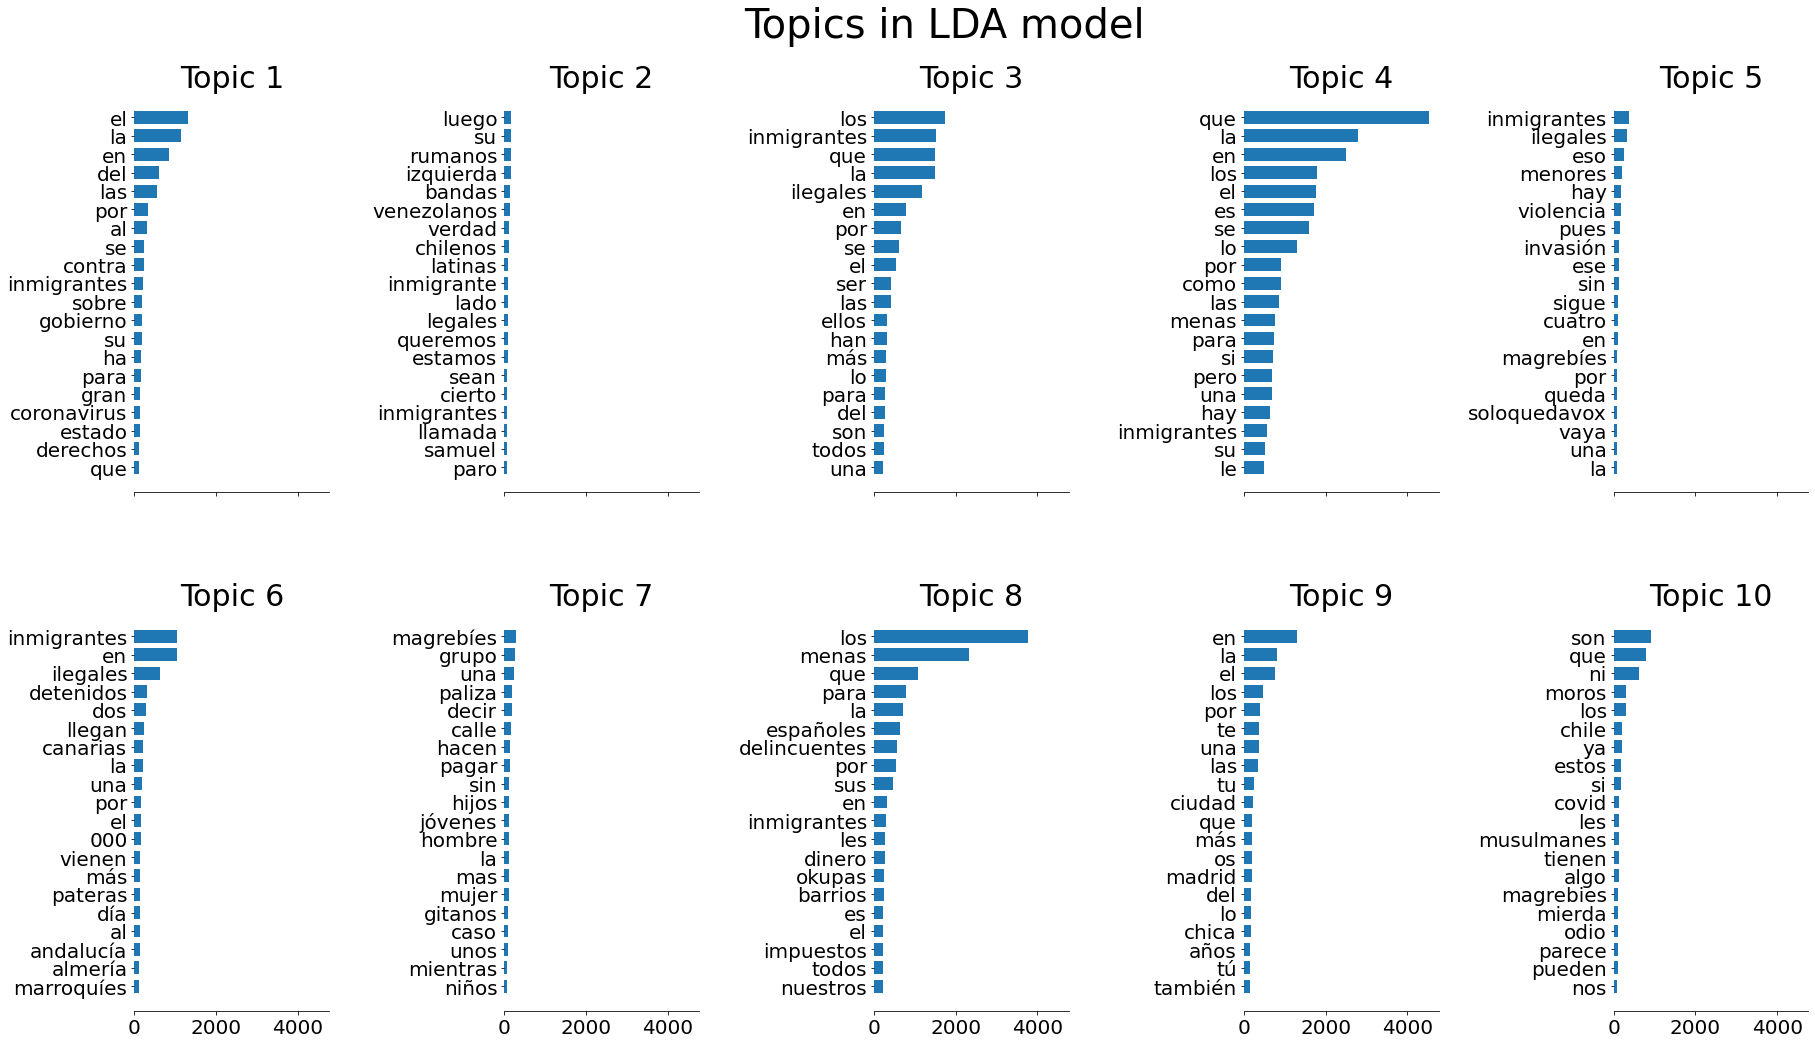

In [23]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


# Classification

In [24]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import f1_score

# Loading dataset containing first five categories
data = fetch_20newsgroups(
    subset="train",
    categories=[
        "alt.atheism",
        "comp.graphics",
        "comp.os.ms-windows.misc",
        "comp.sys.ibm.pc.hardware",
        "comp.sys.mac.hardware",
    ],
)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()



2823 documents
5 categories



In [28]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [29]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware']

In [30]:
data.filenames

array(['/Users/mhc/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/50486',
       '/Users/mhc/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9822',
       '/Users/mhc/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60407',
       ...,
       '/Users/mhc/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/50490',
       '/Users/mhc/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38691',
       '/Users/mhc/scikit_learn_data/20news_home/20news-bydate-train/comp.os.ms-windows.misc/9675'],
      dtype='<U91')

In [31]:
data.target

array([4, 2, 3, ..., 4, 1, 2])

In [34]:
labels.label.unique()

array(['non-racist', 'racist', 'unknown'], dtype=object)

In [59]:
df_cln = labels.loc[labels['label'] != 'unknown', ['message','label']]
labels, levels = pd.factorize(df_cln.label)
df_cln['label'] = labels

In [60]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8870 entries, 0 to 9290
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  8870 non-null   object
 1   label    8870 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 207.9+ KB


In [61]:
df_cln.label.unique()

array([0, 1])

In [62]:
# Parameters
sdg_params = dict(alpha=1e-5, penalty="l2", loss="log")
vectorizer_params = dict(ngram_range=(1, 2), min_df=5, max_df=0.8)

# Supervised Pipeline
pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ("clf", SGDClassifier(**sdg_params)),
    ]
)
# SelfTraining Pipeline
st_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        ("clf", SelfTrainingClassifier(SGDClassifier(**sdg_params), verbose=True)),
    ]
)
# LabelSpreading Pipeline
ls_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(**vectorizer_params)),
        ("tfidf", TfidfTransformer()),
        # LabelSpreading does not support dense matrices
        ("todense", FunctionTransformer(lambda x: x.todense())),
        ("clf", LabelSpreading()),
    ]
)


def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        "Micro-averaged F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="micro")
    )
    print("-" * 10)
    print()

    

In [63]:
X, y = df_cln.message, df_cln.label
X_train, X_test, y_train, y_test = train_test_split(X, y)

   

In [64]:
print("Supervised SGDClassifier on 100% of the data:")
eval_and_print_metrics(pipeline, X_train, y_train, X_test, y_test)

# select a mask of 20% of the train dataset
y_mask = np.random.rand(len(y_train)) < 0.2

# X_20 and y_20 are the subset of the train dataset indicated by the mask
X_20, y_20 = map(
    list, zip(*((x, y) for x, y, m in zip(X_train, y_train, y_mask) if m))
)
print("Supervised SGDClassifier on 20% of the training data:")
eval_and_print_metrics(pipeline, X_20, y_20, X_test, y_test)

# set the non-masked subset to be unlabeled
y_train[~y_mask] = -1
print("SelfTrainingClassifier on 20% of the training data (rest is unlabeled):")
eval_and_print_metrics(st_pipeline, X_train, y_train, X_test, y_test)

print("LabelSpreading on 20% of the data (rest is unlabeled):")
eval_and_print_metrics(ls_pipeline, X_train, y_train, X_test, y_test)

Supervised SGDClassifier on 100% of the data:
Number of training samples: 6652
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.793
----------

Supervised SGDClassifier on 20% of the training data:
Number of training samples: 1286
Unlabeled samples in training set: 0
Micro-averaged F1 score on test set: 0.712
----------

SelfTrainingClassifier on 20% of the training data (rest is unlabeled):
Number of training samples: 6652
Unlabeled samples in training set: 5366
End of iteration 1, added 3985 new labels.
End of iteration 2, added 539 new labels.
End of iteration 3, added 153 new labels.
End of iteration 4, added 34 new labels.
End of iteration 5, added 21 new labels.
End of iteration 6, added 12 new labels.
End of iteration 7, added 5 new labels.
End of iteration 8, added 17 new labels.
End of iteration 9, added 12 new labels.
End of iteration 10, added 6 new labels.
Micro-averaged F1 score on test set: 0.763
----------

LabelSpreading on 20% of the data (re

/Users/mhc/anaconda3/envs/miri/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/mhc/anaconda3/envs/miri/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Micro-averaged F1 score on test set: 0.699
----------

